# Ensemble(Boosting : Adaboost, GBM, XGBoost) 실습

## Adaboost

반복적으로 진행되고 있듯이, 데이터를 입력하여 데이터 분할부터 진행한다. 이번에는 다른 데이터인 보스턴 집값 예측 데이터를 입력해보자.

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [4]:
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

adaboost는 기본적으로 base model을 decision tree를 활용하며, 주요 파라미터를 estimator 수와 learning rate를 조절한다.

In [8]:
# adaboost 객체 생성 및 fit
ada = AdaBoostRegressor(n_estimators=10, learning_rate=0.1)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [10]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 3.63214334656


각 모델의 error를 출력해볼 수 있다.현재 estimator를 10개로 설정하였기 때문에, error는 총 10개가 나올것이다.

In [12]:
# adaboost 객체 명시  # base estimator 각각의 모델에 대한 error값
print((ada.estimator_errors_))

[ 0.09617427  0.14033274  0.1582486   0.12986335  0.10736398  0.14290966
  0.11471724  0.12076462  0.13138434  0.23444411]


In [13]:
# adaboost 객체 명시
print(np.mean(ada.estimator_errors_))

0.137620290527


기본 디폴트 base model 이외의 다른 base model을 사용해보자. SVR를 base model로 사용하여 성능을 확인해보자.

In [16]:
from sklearn.svm import SVR

In [18]:
# svr 모형 생성
svr = SVR(kernel="linear")
# adaboost 의 base_estimator로 svr을 추가
ada_svr = AdaBoostRegressor(n_estimators=10, base_estimator= svr, learning_rate=0.1)
ada_svr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         learning_rate=0.1, loss='linear', n_estimators=10,
         random_state=None)

In [19]:
y_pred = ada_svr.predict(X_test)
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))   #값이 작을 수록 좋다.

RMSE: 5.14201820021


위에서 decision tree를 base model로 활용한 것보다 svr을 활용한것이 RMSE가 미세하게 높게 나타났다.

AdaBoost는 Base Model 다른것 사용할 수 있다.  
MES값이 decisiotree가 더 낮으므로 DecisionTree가 더 좋다.

## GBM

GBM은 마찬가지로 scikit-learn의 ensemble 안에 함수가 구현되어있다. 위에서 사용했던 데이터에 대해 그대로 적용해본다.

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
#GBM 생성 및 fit (max_depth = 3 으로)
GBM_reg = GradientBoostingRegressor(n_estimators=10,learning_rate=0.1, max_depth=3)
GBM_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [8]:
y_pred = GBM_reg.predict(X_test)
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 5.49528810651


estimator의 수에 따른 RMSE의 변화를 한번 살펴보자

In [12]:
est_list = [10,20,30,40,50]
for n_estimator in est_list:
    # GBM 생성 및 fit
    GBM_reg= GradientBoostingRegressor(n_estimators= n_estimator, learning_rate=0.1, max_depth=3)
    GBM_reg.fit(X_train,y_train)
    y_pred = GBM_reg.predict(X_test)
    mse= metrics.mean_squared_error(y_test, y_pred)
    print("RMSE:",np.sqrt(mse))
    print("========================")
    
# estimator가 많을수록 성능이 좋아짐..maybe

RMSE: 5.42816177395
RMSE: 4.14285828939
RMSE: 3.83915348207
RMSE: 3.52777668625
RMSE: 3.42956137542


estimator의 수가 증가함에 따라 테스트 성능인 RMSE가 낮아짐을 확인 할 수 있다.

GBM 또한 다른 Tree 계열들처럼 변수별 가중치와 중요도를 확인 할 수 있다. 이를 차트로 표현해보면 다음과 같다.

Text(0,0.5,'Feature Importance Score')

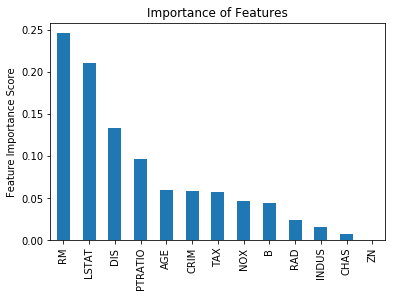

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(GBM_reg.feature_importances_, boston.feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## XGBoost

XGBoost를 사용하기 위해서는 기존의 scikit-learn에서는 포함되어있지 않다. 따로 python 패키지로 구성되어있으므로 설치를 진행해야 한다. command창에서
- pip3 install xgboost
- pip install xgboost

위와 같이 설치를 한 후 import를 한다. 위에서 그대로 해온것처럼 그대로 진행한다.

In [21]:
import xgboost as xgb

In [22]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 2, n_estimators = 10)

비록 scikit-learn 패키지 안에 xgboost가 있지 않지만 사용하는 방식은 매우 흡사하다. 

학습하고자 할때는 fit 함수를, 예측값을 얻고자 할때는 predict함수를 그대로 사용하면된다.

In [23]:
# fit & predict
xg_reg.fit(X_train, y_train)
y_pred= xg_reg.predict(X_test)

[14:55:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 9.66128678034


결과를 보면, 아쉽게도 성능이 위에서 진행한 boosting 알고리즘에 비해 좋지 못한것을 볼 수 있다. XGBoost의 경우 파라미터 튜닝이 매우 중요한 요소인 알고리즘이다. 파라미터 튜닝의 경우는 다음에 따로 다루기로 한다.

XGboost도 마찬가지로 feature importance를 확인할 수 있다.

Text(0,0.5,'Feature Importance Score')

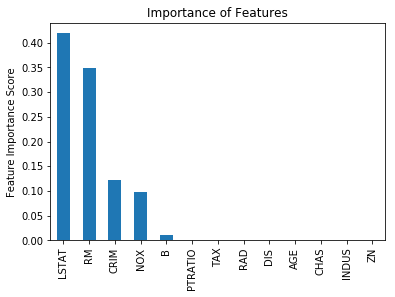

In [25]:
feat_imp = pd.Series(xg_reg.feature_importances_, boston.feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

위의 GBM과는 학습이 다르게 되었음을 feature importance를 확인함으로써 알수있다.